# Solusi Pers. Maxwell 1D metode FDTD

Persamaan gelombang EM dimensi satu atau gelombang bidang yang merambat ke arah positif $x$ yaitu 
\begin{align}
\frac{\partial B_z}{\partial t} & = - \frac{\partial E_y}{\partial x} \\
\frac{\partial E_y}{\partial t} & = - \frac{1}{\mu_0\epsilon_0}\frac{\partial B_z}{\partial x}  
\end{align}

Persamaan tanpa dimensinya  adalah
\begin{align}
\frac{\partial B_z}{\partial t} & = - \frac{\partial E_y}{\partial x} \label{eqn-1d1}\\
\frac{\partial E_y}{\partial t} & = - \frac{\partial B_z}{\partial x} \label{eqn-1d2} 
\end{align}

Kita menggunakan spasi grid kita menghitung medan listrik pada waktu $t =n \Delta t$ dan posisi $x = i\Delta x$ dan medan magnet pada waktu $t = (n+\frac{1}{2})\Delta t$ dan posisi $x = (i+\frac{1}{2})\Delta x$ dengan $n = 0, 1, 2\ldots$ dan $i = 0, 1, 2, \ldots$.

![Grid EM 1D](gridEM1d.png)

Persamaan numerik (baca di Buku pak Wayan):
\begin{align}
B_z^{n+\tfrac{1}{2}}(i + \tfrac{1}{2}) =  B_z^{n-\tfrac{1}{2}}(i+ \tfrac{1}{2}) -\frac{\Delta t}{\Delta x}\left[E_y^n(i+1) - E_y^n(i)\right]  \label{eqn-num1d1}
\end{align}	

\begin{align}
E_y^{n+1}(i) =  E_y^n(i) - \frac{\Delta t}{\Delta x}\left[B_z^{n+\tfrac{1}{2}}(i+\tfrac{1}{2}) - B_z^{n+\tfrac{1}{2}}(i-\tfrac{1}{2})\right]  \label{eqn-num1d2}
\end{align}	


Supaya komputasi stabil, $\Delta t$ harus memenuhi syarat stabilitas berikut ini
\begin{equation}
\Delta t \leq \Delta x
\end{equation}

In [1]:
%matplotlib inline

In [2]:
# import modul yang dibutuhkan

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math

In [3]:
# input parameter

# Jumlah grid
NX = 200

i = 0
n = 0
ic = NX//2
dx = 0.02

# untuk simulasi yang stabil dt < dx
dt = dx/2.0; 
dtdivdx = dt/dx

freq = 1.0
omega = 2.0*math.pi*freq

In [4]:
# Posisi Tengah
x0 = ic*dx


# Array nilai x
x = np.arange(NX+1)*dx -x0

In [5]:
# Membuat array zeros sebanyak (N+1) untuk grid
ey = np.zeros([NX+1])
bz = np.zeros([NX+1])

n=0
NT = 100
for n in range(NT):
    n = n + 1
    # (2) Update Bz
    for i in range(0,NX):
        bz[i] = bz[i] - dtdivdx*(ey[i+1] - ey[i])

    # (3) Membuat pembangkit Gelombang EM dengan gelombang pulsa
    
    # opsi pembangkit gelombang lainnya menggunakan fungsi sinus
    # bz[ic] = bz[ic] + math.sin(omega*n*dt)
    
    # pembangkit gelombang pulsa
    if n<60:
        bz[ic] = bz[ic] + 2.0*math.exp(-0.005*(n-30.0)*(n-30.0))
    
    # (4) Update Ey
    for i in range(1,NX):
        ey[i] = ey[i] - dtdivdx*(bz[i] - bz[i-1])

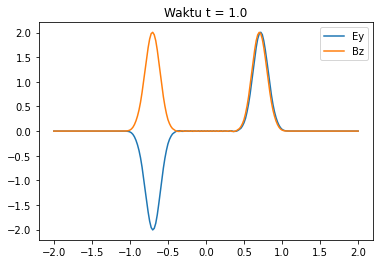

In [6]:
# Hasil setelah 100 iterasi
t = NT*dt
plt.plot(x,ey, label="Ey")
plt.plot(x,bz, label="Bz")
plt.title('Waktu t = '+ str(t))
plt.legend()
plt.show()

In [7]:
# Hitung lagi dan menyimpan hasil
eyt = []
s = []

# Membuat array zeros sebanyak (N+1) untuk grid
ey = np.zeros([NX+1])
bz = np.zeros([NX+1])

n=0
NT = 500
for n in range(NT):
    n = n + 1
    t = n*dt
    # (2) Update Bz
    for i in range(0,NX):
        bz[i] = bz[i] - dtdivdx*(ey[i+1] - ey[i])

    # (3) Membuat pembangkit Gelombang EM dengan gelombang pulsa
    
    # opsi pembangkit gelombang lainnya menggunakan fungsi sinus
    # bz[ic] = bz[ic] + math.sin(omega*n*dt)
    
    # pembangkit gelombang pulsa
        bz[ic] = bz[ic] + 2.0*math.exp(-0.005*(n-30.0)*(n-30.0))
    
    # (4) Update Ey
    for i in range(1,NX):
        ey[i] = ey[i] - dtdivdx*(bz[i] - bz[i-1])
    
    # Simpan setiap 10 iterasi untuk visualisasi
    if n%10 == 0:
        eyt.append(list(ey))
        s.append('t = ' + str(t)[0:3])


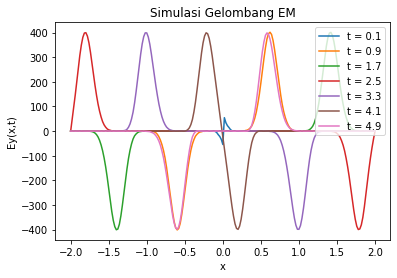

In [8]:
# Visualisasi hasil
for k in range(0,len(eyt),8):
    plt.plot(x,eyt[k])

plt.title('Simulasi Gelombang EM')
plt.xlabel('x')
plt.ylabel('Ey(x,t)')
plt.legend(s[0:len(eyt):8])
plt.show()

## Membuat animasi GIF

In [9]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [10]:
# Create images using plot
for k in range(len(eyt)):
    plt.plot(x,eyt[k])
    plt.axis('off')
    plt.ylim([-2.5,2.5])
    filename = 'em-wave1d' + str(k) + '.png'
    plt.xticks(ticks=None)
    plt.savefig(filename)
    plt.close('all')
    # plt.show()

In [11]:
# Create animated gif
images = []
for i in range(len(eyt)):
    filename = 'em-wave1d' + str(i) + '.png'
    images.append(imageio.imread(filename))
imageio.mimsave('em-wave1d.gif', images)

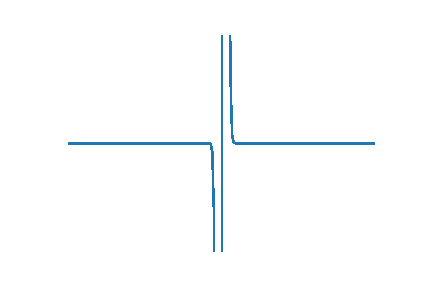

In [12]:
# Show animasi
Image("em-wave1d.gif", width=300, height=300)